In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [15]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
random.seed(1234)

# **Exercise 1** (10 points)
Read pages 227-233 from the attached pdf file.

(a) Briefly explain what are the differences between gradient descent, gradient descent with
momentum, and stochastic gradient descent.

(b) Using the given Python code for stochastic gradient descent (SGD), write a script to compare SGD and the gradient descent algorithm that was demonstrated during lecture. For both algorithms, use the same cost function and by starting with an initial guess from a Gaussian distribution, and by using 1000 iterations and a learning rate of 0.01, **compare stochastic gradient descent and gradient descent** in terms of convergence speed
and accuracy. Try different learning rate and discuss your results. Demonstrate your results using figures like we did in class.

In [16]:
# cost function
def  calculate_cost(theta, X, y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''  
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

## Grident Descent

In [17]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = calculate_cost(theta,X,y)
        
    return theta, cost_history, theta_history

### Start with an initial guess from a Gaussian distribution by 1000 iterations and 0.01 learning rate

In [23]:
learning_rate = 0.01
n_iter = 1000

theta = np.random.randn(2, 1) # standard normal distribution
print(theta)
X_b = np.c_[np.ones((len(X),1)),X]
#print(X_b)
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

[[ 0.46593154]
 [-0.63794813]]
Theta0:          4.048,
Theta1:          2.942
Final cost/MSE:  5297.841


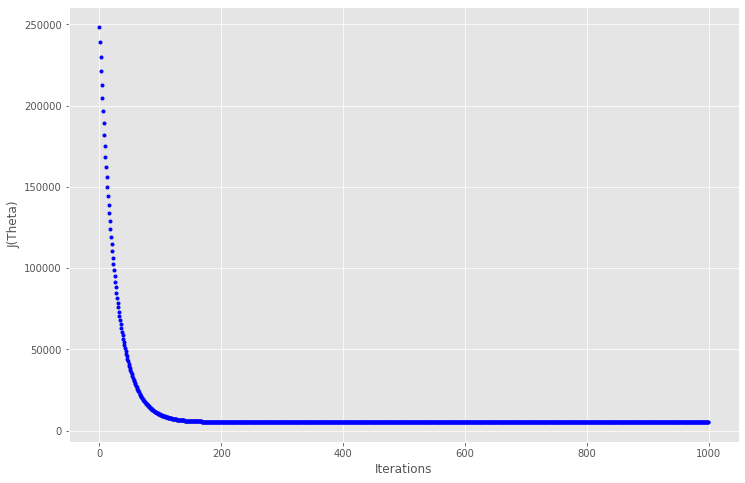

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
=ax.plot(range(n_iter),cost_history,'b.')

### Let's zoom in until iteration 150. Because the rest are almost a flatten line.

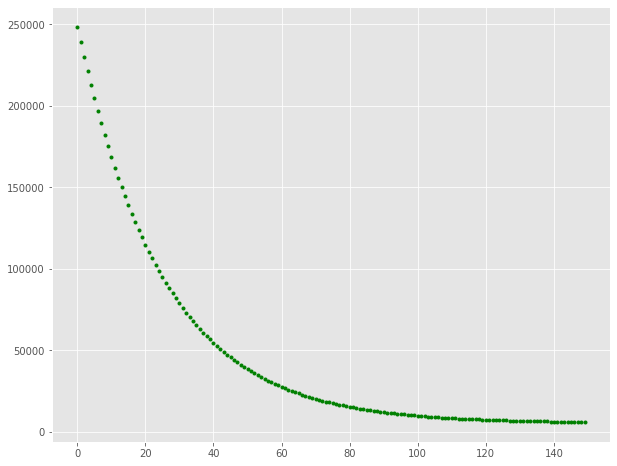

In [32]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(150),cost_history[:150],'g.')

### Define a function that combines the effects and demonstrates how gradient descent works.

In [33]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

# Change the different iterations and learning rate to visualize the outcome  

In [ ]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace = 0.4)

it_lr =[(1000, 0.01), (100, 0.05), (50, 0.1), (50, 0.001)] # literation, learning rate
count =0
for n_iter, lr in it_lr:
  count += 1

  ax = fig.add_subplot(4, 2, count)
  count += 1

  ax1 = fig.add_subplot(4, 2,count)

  ax.set_title("lr:{}".format(lr))
  ax1.set_title("Iterations:{}".format(n_iter))
  plot_GD(n_iter,lr,ax,ax1)

## Stochastic Gradient Descent (SGD)



In [39]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

### Define a function that combines the effects and demonstrates how SGD works

In [40]:
def plot_SGD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

In [ ]:
"""
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace = 0.4)

it_lr =[(1000, 0.01), (100, 0.05), (50, 0.1), (50, 0.001)] # literation, learning rate
count =0
for n_iter, lr in it_lr:
  count += 1

  ax = fig.add_subplot(4, 2, count)
  count += 1

  ax1 = fig.add_subplot(4, 2,count)

  ax.set_title("lr:{}".format(lr))
  ax1.set_title("Iterations:{}".format(n_iter))
  plot_SGD(n_iter,lr,ax,ax1)
"""